<a href="https://colab.research.google.com/github/shriver42/ESAA/blob/project/YB_1%EC%A1%B0_store_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기

## train data set

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")
submission = pd.read_csv("/content/sample_submission.csv")

stores = pd.read_csv("/content/stores.csv")
oil = pd.read_csv("/content/oil.csv")
holidays_events = pd.read_csv("/content/holidays_events.csv")
transactions = pd.read_csv("/content/transactions.csv")

# 2. 데이터 탐색

In [ ]:
train_data.shape

(54704, 6)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54704 entries, 0 to 54703
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           54704 non-null  int64  
 1   date         54703 non-null  object 
 2   store_nbr    54703 non-null  float64
 3   family       54703 non-null  object 
 4   sales        54703 non-null  float64
 5   onpromotion  54703 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ MB


판매량 데이터는 1187270개, 피쳐 변수는 5개 (이 중 한 개는 구분자 역할인 index), 타켓 변수는 sales

In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54704 entries, 0 to 54703
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           54704 non-null  int64         
 1   date         54703 non-null  datetime64[ns]
 2   store_nbr    54703 non-null  float64       
 3   family       54703 non-null  object        
 4   sales        54703 non-null  float64       
 5   onpromotion  54703 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
train_data.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0
5,5,2013-01-01,1.0,BREAD/BAKERY,0.0,0.0
6,6,2013-01-01,1.0,CELEBRATION,0.0,0.0
7,7,2013-01-01,1.0,CLEANING,0.0,0.0
8,8,2013-01-01,1.0,DAIRY,0.0,0.0
9,9,2013-01-01,1.0,DELI,0.0,0.0




*  store_nbr: 상품이 판매된 가게
*  family: 상품의 카테고리
*  sales: 판매된 상품의 양
*  onpromotion: 프로모션된 횟수


In [ ]:
train_data["sales"].value_counts()

sales
0.000       29499
1.000        1233
2.000         989
3.000         758
4.000         614
            ...  
5307.000        1
198.548         1
424.621         1
1757.000        1
1660.000        1
Name: count, Length: 9008, dtype: int64

### 시간에 따른 sales 시각화

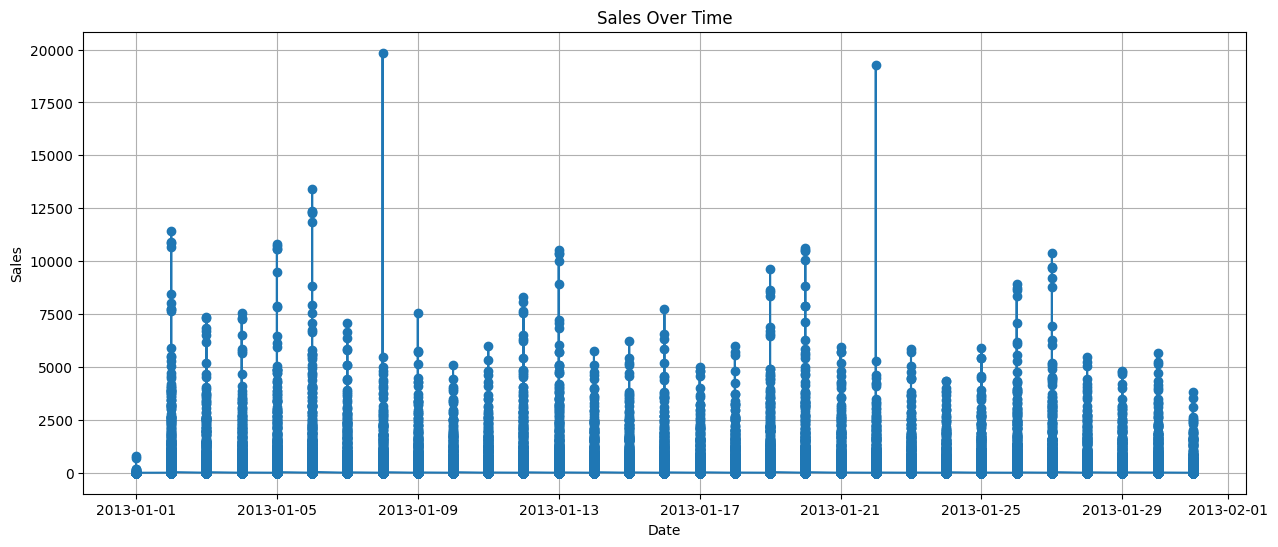

In [ ]:
# 시계열 그래프 그리기
plt.figure(figsize=(15, 6))
plt.plot(train_data['date'], train_data['sales'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.grid(True)
plt.show()

지진 남;; -> 이상치 처리 해볼 것

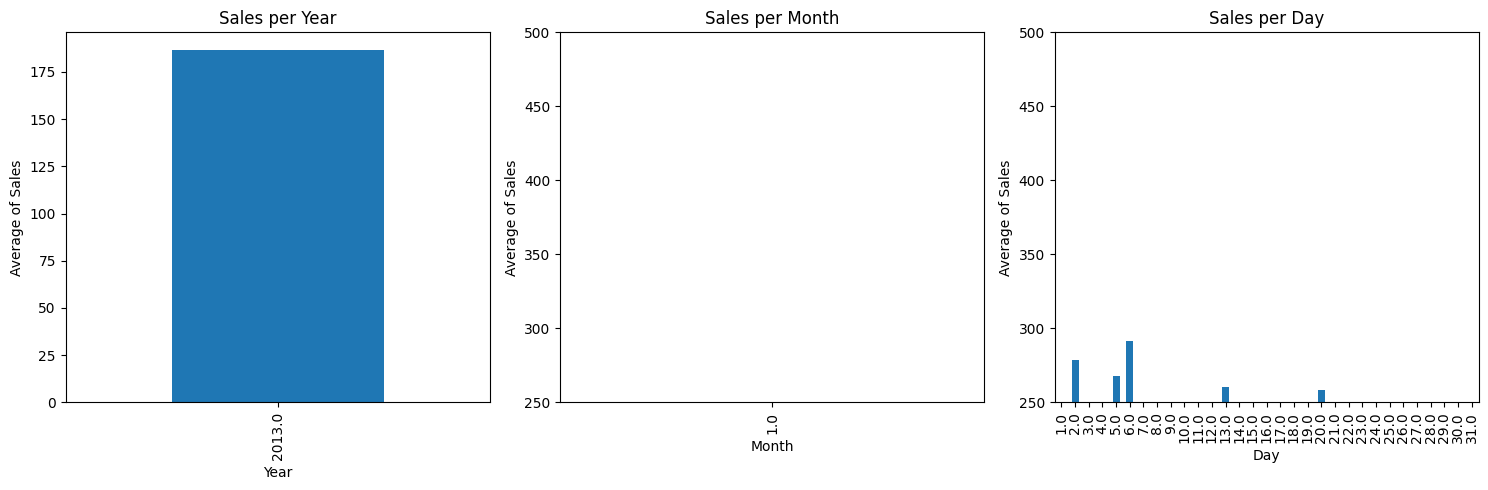

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 연도별 sales 평균 계산
train_data['year'] = train_data['date'].dt.year
yearly_sales_avg = train_data.groupby('year')['sales'].mean()

# 월별 sales 평균 계산
train_data['month'] = train_data['date'].dt.month
monthly_sales_avg = train_data.groupby('month')['sales'].mean()

# 일별 sales 평균 계산
train_data['day'] = train_data['date'].dt.day
daily_sales_avg = train_data.groupby('day')['sales'].mean()

# 그래프 그리기
plt.figure(figsize=(15, 5))

# 연도별 sales 평균 그래프
plt.subplot(1, 3, 1)
yearly_sales_avg.plot(kind='bar')
plt.title("Sales per Year")
plt.xlabel('Year')
plt.ylabel('Average of Sales')

# 월별 sales 평균 그래프
plt.subplot(1, 3, 2)
monthly_sales_avg.plot(kind='bar')
plt.title("Sales per Month")
plt.xlabel("Month")
plt.ylabel('Average of Sales')
plt.ylim(250, 500)

# 일별 sales 평균 그래프
plt.subplot(1, 3, 3)
daily_sales_avg.plot(kind='bar')
plt.title('Sales per Day')
plt.xlabel('Day')
plt.ylabel('Average of Sales')
plt.ylim(250, 500)

plt.tight_layout()
plt.show()


### 지점별 sales 시각화

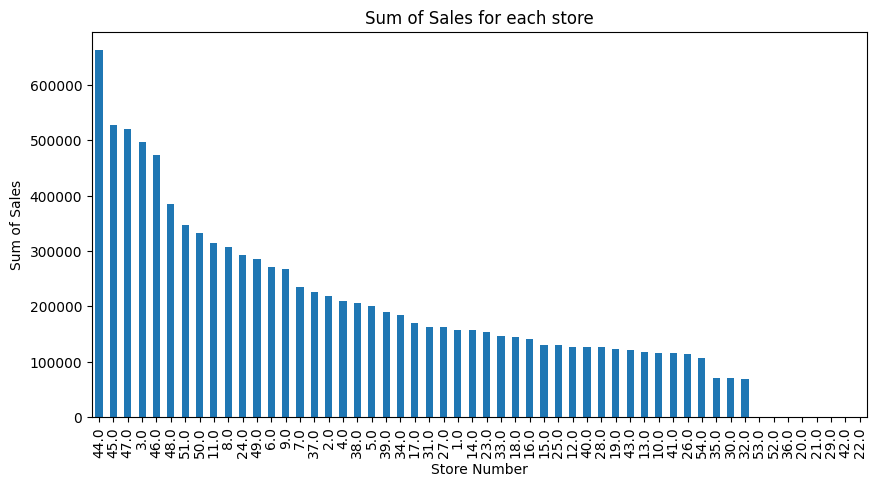

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# store_nbr별 sales 합계 계산 및 정렬
store_sales_sum = train_data.groupby('store_nbr')['sales'].sum().sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 5))
store_sales_sum.plot(kind='bar')
plt.title('Sum of Sales for each store')
plt.xlabel('Store Number')
plt.ylabel('Sum of Sales')
plt.show()


## Additional files including supplementary information

### 1. stores 데이터
 - store 데이터와 transaction 데이터 전처리

In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
stores["city"].value_counts()

city
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: count, dtype: int64

In [ ]:
stores["state"].value_counts()

state
Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: count, dtype: int64

In [ ]:
stores["cluster"].value_counts()

cluster
3     7
6     6
10    6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
9     2
7     2
2     2
12    1
5     1
16    1
17    1
Name: count, dtype: int64

In [ ]:
merged_df = pd.merge(transactions, stores, on='store_nbr', how='inner')

In [ ]:
merged_df.drop(['city','state'],axis = 1)

,date,store_nbr,transactions,type,cluster
0,2013-01-01,25,770,D,1
1,2013-01-02,25,1038,D,1
2,2013-01-03,25,887,D,1
3,2013-01-04,25,1054,D,1
4,2013-01-05,25,1355,D,1
...,...,...,...,...,...
83483,2017-08-11,52,2957,A,11
83484,2017-08-12,52,2804,A,11
83485,2017-08-13,52,2433,A,11
83486,2017-08-14,52,2074,A,11


In [ ]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [ ]:
merged_df.head()

,date,store_nbr,transactions,city,state,type,cluster
0,2013-01-01,25,770,Salinas,Santa Elena,D,1
1,2013-01-02,25,1038,Salinas,Santa Elena,D,1
2,2013-01-03,25,887,Salinas,Santa Elena,D,1
3,2013-01-04,25,1054,Salinas,Santa Elena,D,1
4,2013-01-05,25,1355,Salinas,Santa Elena,D,1


In [ ]:
train_data_a = pd.merge(train_data,merged_df, on=['date','store_nbr'], how='inner')

In [ ]:
train_data = train_data_a.drop(['city','state'], axis = 1)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45100 entries, 0 to 45099
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            45100 non-null  int64         
 1   date          45100 non-null  datetime64[ns]
 2   store_nbr     45100 non-null  float64       
 3   family        45100 non-null  object        
 4   sales         45100 non-null  float64       
 5   onpromotion   45100 non-null  float64       
 6   year          45100 non-null  float64       
 7   month         45100 non-null  float64       
 8   day           45100 non-null  float64       
 9   transactions  45100 non-null  int64         
 10  type          45100 non-null  object        
 11  cluster       45100 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 4.1+ MB


### 2. oil 데이터

In [ ]:
oil.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


Text(0, 0.5, 'Crude Oil')

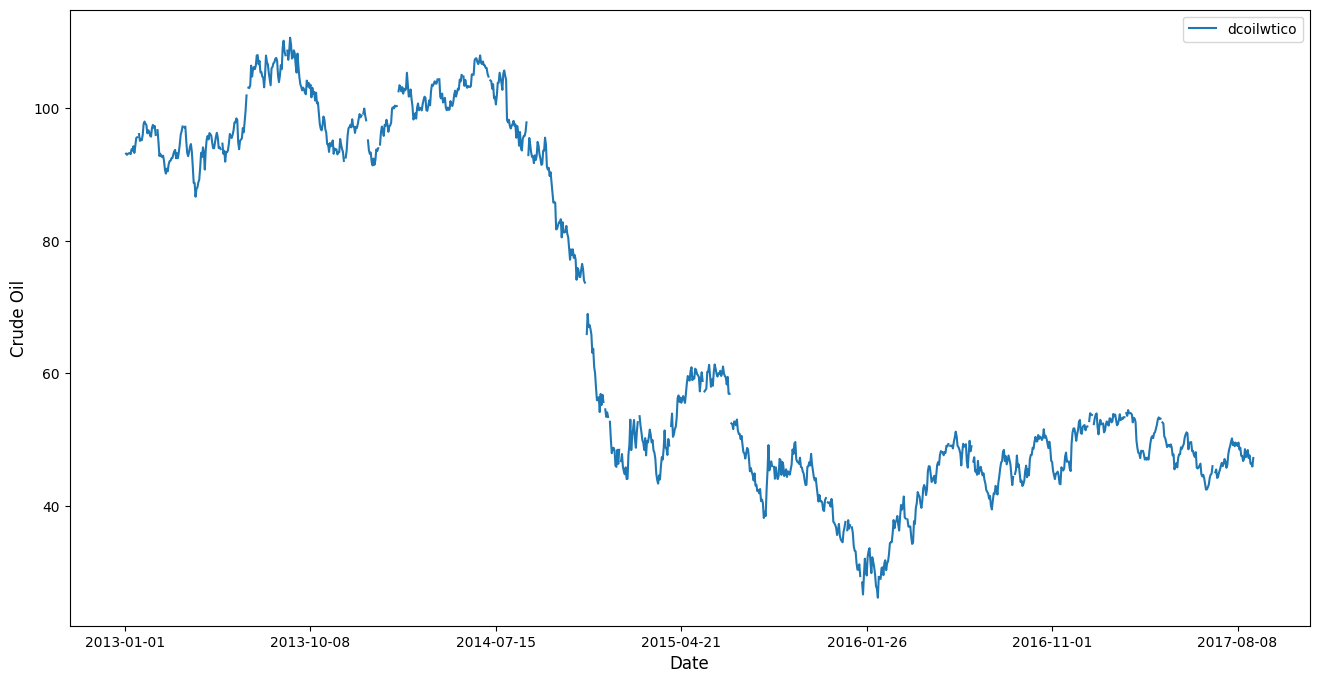

In [ ]:
ax = oil.set_index('date').plot(figsize = (16, 8))
ax.set_xlabel('Date', fontsize = 'large')
ax.set_ylabel("Crude Oil", fontsize = 'large')

In [ ]:
# NaN 값을 바로 앞과 바로 뒤의 행의 평균 값으로 대체
for i in range(1, len(oil) - 1):
    if pd.isna(oil.loc[i, 'dcoilwtico']):
        previous_value = oil.loc[i - 1, 'dcoilwtico']
        next_value = oil.loc[i + 1, 'dcoilwtico']
        if not pd.isna(previous_value) and not pd.isna(next_value):
            oil.loc[i, 'dcoilwtico'] = (previous_value + next_value) / 2

# 2013-01-01의 dcoilwtico 값을 2013-01-02의 값으로 변경
oil.loc[oil['date'] == '2013-01-01', 'dcoilwtico'] = oil.loc[oil['date'] == '2013-01-02', 'dcoilwtico'].values[0]

oil.head(20)

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


Text(0, 0.5, 'Crude Oil')

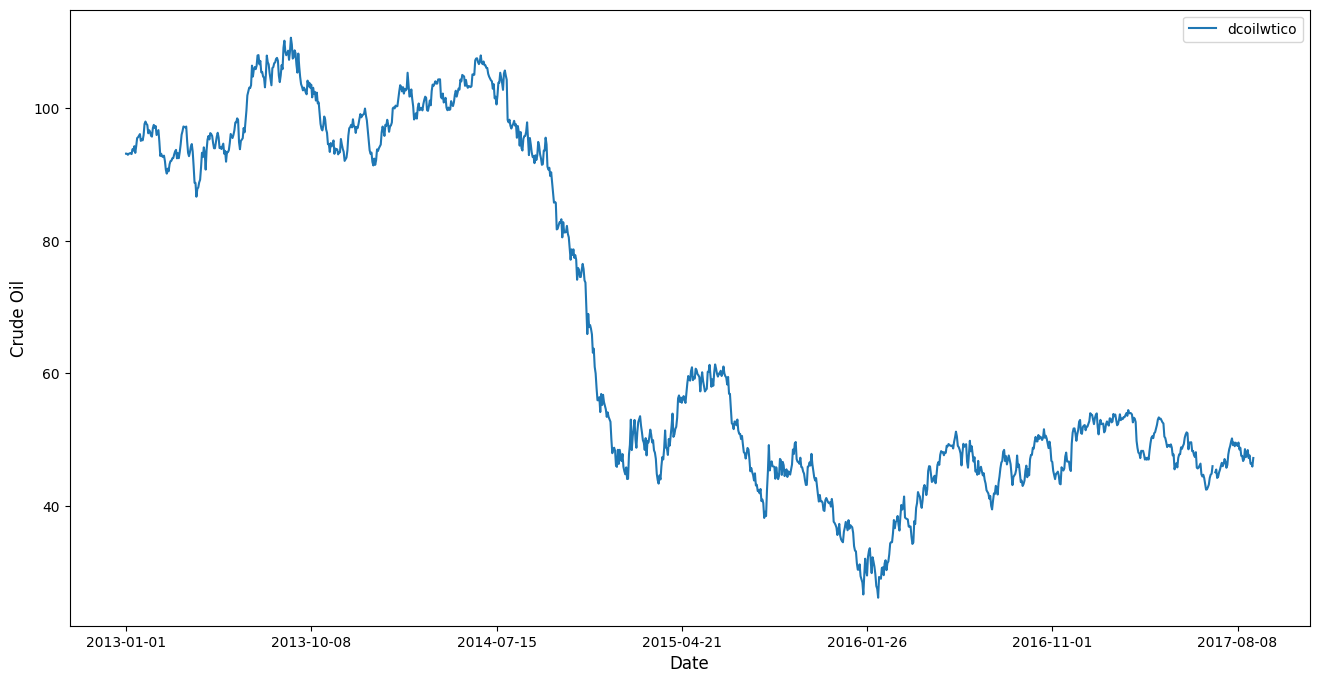

In [ ]:
ax = oil.set_index('date').plot(figsize = (16, 8))
ax.set_xlabel('Date', fontsize = 'large')
ax.set_ylabel("Crude Oil", fontsize = 'large')

끊긴 부분 없이 이어지는 게 확인 가능하다

In [ ]:
oil['date'] = pd.to_datetime(oil['date'])
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


Train-Test 데이터에 oil데이터 추가

In [ ]:
# Convert date columns to datetime type
train_data['date'] = pd.to_datetime(train_data['date'])
oil['date'] = pd.to_datetime(oil['date'])

# Merge train_data and oil DataFrames on 'date' column
merged_data = pd.merge(train_data, oil, on='date', how='left')
train_data = merged_data

### 3. holidays 데이터

다른 날짜로 공휴일이 옮겨진 경우에는 데이터 삭제

In [ ]:
# transferred=True인 행 삭제
holidays_events_filtered = holidays_events[holidays_events['transferred'] == False]

In [ ]:
holidays_events_filtered.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays_events_filtered['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [ ]:
holidays_events_filtered = pd.get_dummies(
    data=holidays_events_filtered,
    columns=['type'],
    prefix=['type'],
    dtype='int32'
)

In [ ]:
holidays_events_filtered.head()

,date,locale,locale_name,description,transferred,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day
0,2012-03-02,Local,Manta,Fundacion de Manta,False,0,0,0,1,0,0
1,2012-04-01,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,0,0,0,1,0,0
2,2012-04-12,Local,Cuenca,Fundacion de Cuenca,False,0,0,0,1,0,0
3,2012-04-14,Local,Libertad,Cantonizacion de Libertad,False,0,0,0,1,0,0
4,2012-04-21,Local,Riobamba,Cantonizacion de Riobamba,False,0,0,0,1,0,0


In [ ]:
holidays_events_filtered['date'] = pd.to_datetime(holidays_events_filtered['date'])
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

train_data = pd.merge(train_data, holidays_events_filtered[['date','type_Additional',	'type_Bridge',	'type_Event',	'type_Holiday',	'type_Transfer','type_Work Day']], on='date', how='left')
train_data.fillna(0, inplace=True)
train_data.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,transactions,type,cluster,dcoilwtico,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day
0,561,2013-01-01,25.0,AUTOMOTIVE,0.0,0.0,2013.0,1.0,1.0,770,D,1,93.14,0.0,0.0,0.0,1.0,0.0,0.0
1,562,2013-01-01,25.0,BABY CARE,0.0,0.0,2013.0,1.0,1.0,770,D,1,93.14,0.0,0.0,0.0,1.0,0.0,0.0
2,563,2013-01-01,25.0,BEAUTY,2.0,0.0,2013.0,1.0,1.0,770,D,1,93.14,0.0,0.0,0.0,1.0,0.0,0.0
3,564,2013-01-01,25.0,BEVERAGES,810.0,0.0,2013.0,1.0,1.0,770,D,1,93.14,0.0,0.0,0.0,1.0,0.0,0.0
4,565,2013-01-01,25.0,BOOKS,0.0,0.0,2013.0,1.0,1.0,770,D,1,93.14,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
test_data["year"]=test_data["date"].dt.year
test_data["month"]=test_data["date"].dt.month
test_data["day"]=test_data["date"].dt.day


In [ ]:
test_data.head()

,id,date,store_nbr,family,onpromotion,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16


#### 위까지가 추가 파일들

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data["onpromotion"].value_counts()

onpromotion
0.0    45100
Name: count, dtype: int64

In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


TEST DATA

oil 추가

In [ ]:
# Convert date columns to datetime type
test_data['date'] = pd.to_datetime(test_data['date'])
oil['date'] = pd.to_datetime(oil['date'])

# Merge train_data and oil DataFrames on 'date' column
test_data = pd.merge(test_data, oil, on='date', how='left')
test_data.head()

,id,date,store_nbr,family,onpromotion,year,month,day,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,46.8
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,46.8
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,46.8
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,46.8
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,46.8


holiday 추가

In [ ]:
holidays_events_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 349
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             338 non-null    datetime64[ns]
 1   locale           338 non-null    object        
 2   locale_name      338 non-null    object        
 3   description      338 non-null    object        
 4   transferred      338 non-null    bool          
 5   type_Additional  338 non-null    int32         
 6   type_Bridge      338 non-null    int32         
 7   type_Event       338 non-null    int32         
 8   type_Holiday     338 non-null    int32         
 9   type_Transfer    338 non-null    int32         
 10  type_Work Day    338 non-null    int32         
dtypes: bool(1), datetime64[ns](1), int32(6), object(3)
memory usage: 29.6+ KB


In [ ]:
test_data['date'] = pd.to_datetime(test_data['date'])
holidays_events_filtered['date'] = pd.to_datetime(holidays_events_filtered['date'])

columns_to_merge = ['date', 'type_Additional', 'type_Bridge', 'type_Event', 'type_Holiday', 'type_Transfer', 'type_Work Day']
merged_data_t = pd.merge(test_data, holidays_events_filtered[columns_to_merge], on='date', how='left')

In [ ]:
merged_data_t.fillna(0, inplace=True)
test_data = merged_data_t

In [ ]:
test_data.head()

,id,date,store_nbr,family,onpromotion,year,month,day,dcoilwtico,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,46.8,0.0,0.0,0.0,0.0,0.0,0.0
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,46.8,0.0,0.0,0.0,0.0,0.0,0.0
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,46.8,0.0,0.0,0.0,0.0,0.0,0.0
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,46.8,0.0,0.0,0.0,0.0,0.0,0.0
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,46.8,0.0,0.0,0.0,0.0,0.0,0.0


family 원핫인코딩

train data

In [ ]:
family_filtered = pd.get_dummies(
    data=train_data,
    columns=['family'],
    prefix=['type'],
    dtype='int32'
)

In [ ]:
train_data = family_filtered

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45100 entries, 0 to 45099
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               45100 non-null  int64         
 1   date                             45100 non-null  datetime64[ns]
 2   store_nbr                        45100 non-null  float64       
 3   sales                            45100 non-null  float64       
 4   onpromotion                      45100 non-null  float64       
 5   year                             45100 non-null  float64       
 6   month                            45100 non-null  float64       
 7   day                              45100 non-null  float64       
 8   transactions                     45100 non-null  int64         
 9   type                             45100 non-null  object        
 10  cluster                          45100 non-null  int64    

test data

In [ ]:
test_data = pd.get_dummies(
    data = test_data,
    columns = ['family'],
    prefix = ['type'],
    dtype = 'int32'
)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               28512 non-null  int64         
 1   date                             28512 non-null  datetime64[ns]
 2   store_nbr                        28512 non-null  int64         
 3   onpromotion                      28512 non-null  int64         
 4   year                             28512 non-null  int32         
 5   month                            28512 non-null  int32         
 6   day                              28512 non-null  int32         
 7   dcoilwtico                       28512 non-null  float64       
 8   type_Additional                  28512 non-null  float64       
 9   type_Bridge                      28512 non-null  float64       
 10  type_Event                       28512 non-null  float64  

type, cluster 원핫인코딩

train data

In [ ]:
train_data = pd.get_dummies(
    data = train_data,
    columns = ['type', 'cluster'],
    prefix = ['type','cluster'],
    dtype = 'int32'
)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45100 entries, 0 to 45099
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               45100 non-null  int64         
 1   date                             45100 non-null  datetime64[ns]
 2   store_nbr                        45100 non-null  float64       
 3   sales                            45100 non-null  float64       
 4   onpromotion                      45100 non-null  float64       
 5   year                             45100 non-null  float64       
 6   month                            45100 non-null  float64       
 7   day                              45100 non-null  float64       
 8   transactions                     45100 non-null  int64         
 9   dcoilwtico                       45100 non-null  float64       
 10  type_Additional                  45100 non-null  float64  

test data

In [ ]:
test_data.drop(['id'], axis = 1)

,date,store_nbr,onpromotion,year,month,day,dcoilwtico,type_Additional,type_Bridge,type_Event,...,type_MAGAZINES,type_MEATS,type_PERSONAL CARE,type_PET SUPPLIES,type_PLAYERS AND ELECTRONICS,type_POULTRY,type_PREPARED FOODS,type_PRODUCE,type_SCHOOL AND OFFICE SUPPLIES,type_SEAFOOD
0,2017-08-16,1,0,2017,8,16,46.80,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-08-16,1,0,2017,8,16,46.80,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-08-16,1,2,2017,8,16,46.80,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-08-16,1,20,2017,8,16,46.80,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-08-16,1,0,2017,8,16,46.80,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,9,1,2017,8,31,47.26,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
28508,2017-08-31,9,0,2017,8,31,47.26,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
28509,2017-08-31,9,1,2017,8,31,47.26,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
28510,2017-08-31,9,9,2017,8,31,47.26,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [ ]:
test_data = pd.merge(test_data, stores, on = 'store_nbr', how = 'inner')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               28512 non-null  int64         
 1   date                             28512 non-null  datetime64[ns]
 2   store_nbr                        28512 non-null  int64         
 3   onpromotion                      28512 non-null  int64         
 4   year                             28512 non-null  int32         
 5   month                            28512 non-null  int32         
 6   day                              28512 non-null  int32         
 7   dcoilwtico                       28512 non-null  float64       
 8   type_Additional                  28512 non-null  float64       
 9   type_Bridge                      28512 non-null  float64       
 10  type_Event                       28512 non-null  float64  

In [ ]:
test_data = test_data.drop(['city','state'], axis = 1)
test_data = pd.get_dummies(
    data = test_data,
    columns = ['type','cluster'],
    prefix = ['type', 'cluster'],
    dtype = 'int32'
)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 69 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               28512 non-null  int64         
 1   date                             28512 non-null  datetime64[ns]
 2   store_nbr                        28512 non-null  int64         
 3   onpromotion                      28512 non-null  int64         
 4   year                             28512 non-null  int32         
 5   month                            28512 non-null  int32         
 6   day                              28512 non-null  int32         
 7   dcoilwtico                       28512 non-null  float64       
 8   type_Additional                  28512 non-null  float64       
 9   type_Bridge                      28512 non-null  float64       
 10  type_Event                       28512 non-null  float64  

In [ ]:
trans_a = transactions.drop(['date'], axis = 1)
trans_a = trans_a.groupby(by='store_nbr').mean()

In [ ]:
test_data = pd.merge(test_data, trans_a, on ='store_nbr', how = 'inner')

In [ ]:
train_data = train_data.drop(['id','date'], axis=1)
test_data = test_data.drop(['id','date'], axis=1)

###모델링

In [ ]:
X_train = train_data.drop(["sales"], axis=1)
Y_train = train_data['sales']

from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
import re
df = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, Y_train, test_size = 0.3)

lgbm

In [ ]:
X_train = train_data.drop(["sales"], axis=1)
Y_train = train_data['sales']

from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
import re
df = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, Y_train, test_size = 0.3)
mylgbm = LGBMRegressor()
mylgbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.139820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 808543, number of used features: 68
[LightGBM] [Info] Start training from score 311.783070


LGBMRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = mylgbm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print('rmse : {0:.3f}'.format(rmse))

rmse : 223.058


linear

In [ ]:
from sklearn.linear_model import LinearRegression

mymlr = LinearRegression()
mymlr.fit(x_train, y_train)
y_pred = mymlr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print('rmse : {0:.3f}'.format(rmse))

rmse : 582.760


Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

Ridge()

In [ ]:
y_pred = ridge_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse : {0:.3f}'.format(rmse))

rmse : 582.760


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(ridge_reg, param_grid={ 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] },
                              scoring='neg_mean_squared_error', cv=5)
grid_model.fit(x_train, y_train)
best_ridge = grid_model.best_estimator_
best_ridge.fit(x_train, y_train)
y_pred=best_ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse : {0:.3f}'.format(rmse))

rmse : 582.760


lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

Lasso()

In [ ]:
y_pred = lasso_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse : {0:.3f}'.format(rmse))

rmse : 583.912


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
grid_model = GridSearchCV(lasso_reg, param_grid={ 'alpha':[0.001,0.03,0.5] },
                              scoring='neg_mean_squared_error', cv=3)
grid_model.fit(x_train, y_train)
best_lasso = grid_model.best_estimator_
best_lasso.fit(x_train, y_train)
y_pred=best_lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse : {0:.3f}'.format(rmse))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.043e+08, tolerance: 1.027e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+09, tolerance: 1.004e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.114e+08, tolerance: 1.053e

rmse : 398.248


Bagging

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
from sklearn.ensemble import BaggingRegressor
mybagg = BaggingRegressor()
mybagg.fit(x_train, y_train)

BaggingRegressor()

In [ ]:
y_pred = mybagg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse : {0:.3f}'.format(rmse))

rmse : 205.402


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

mybagging = BaggingRegressor()

param_grid = {
    'n_estimators': [10, 30, 50],  # 사용할 앙상블 모델의 수
    'max_samples': [0.5, 1.0],  # 학습 데이터의 최대 샘플 비율 또는 최대 샘플 수
}

# GridSearchCV 초기화
grid_search = GridSearchCV(estimator=mybagging, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# 최적의 매개변수를 찾기 위해 모델 학습
grid_search.fit(x_train, y_train)

best_bagging = grid_search.best_estimator_
best_bagging.fit(x_train,y_train)
y_pred=best_bagging.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse : {0:.3f}'.format(rmse))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
rmse : 110.523


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# CART Algorithm for regression
cart_reg = DecisionTreeRegressor(max_depth =3) # mse
cart_reg.fit(x_train, y_train)
y_pred = cart_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse:{0:.3f}'.format(rmse))

rmse:520.070


6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse:{0:.3f}'.format(rmse))

rmse:170.812


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [10, 15]
}

rf = RandomForestRegressor()
grid_cv = GridSearchCV(rf , param_grid=params , scoring='neg_mean_squared_error', cv=2, n_jobs=-1)
grid_cv.fit(x_train,y_train)

rf_grid=grid_cv.best_estimator_
rf_grid.fit(x_train,y_train)
y_pred=rf_grid.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse:{0:.3f}'.format(rmse))

rmse:114.577


gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse:{0:.3f}'.format(rmse))

rmse:168.701


In [ ]:
params = {
    'n_estimators':[100, 300, 500],
    'learning_rate' : [0.05, 0.1, 0.3]
}
grid_cv = GridSearchCV(gb , param_grid=params , scoring='neg_mean_squared_error', cv=2, n_jobs=-1)
grid_cv.fit(x_train,y_train)

gb_grid=grid_cv.best_estimator_
gb_grid.fit(x_train,y_train)
y_pred=gb_grid.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse:{0:.3f}'.format(rmse))

rmse:105.607


xgboost

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse:{0:.3f}'.format(rmse))

rmse:196.267


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100)
params = {'n_estimators': [50, 100, 200], 'max_depth':[3, 5, 7, 10] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 2로 지정
gridcv = GridSearchCV(xgb, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
gridcv.fit(x_train, y_train)

xgb_grid=gridcv.best_estimator_
xgb_grid.fit(x_train,y_train)
y_pred=xgb_grid.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse:{0:.3f}'.format(rmse))

rmse:104.976


elastic

In [ ]:
from sklearn.linear_model import ElasticNet

myelastic = ElasticNet()
myelastic.fit(x_train, y_train)
y_pred = myelastic.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse:{0:.3f}'.format(rmse))

rmse:879.774


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

myelastic = ElasticNet()

param_grid = {
    'alpha': np.logspace(-4, 0, 10),  # 모델의 정규화 강도를 조절합니다.
    'l1_ratio': np.arange(0.0, 1.0, 0.1)  # ElasticNet 혼합 매개변수입니다. 0은 L2 규제만을 의미하고, 1은 L1 규제만을 의미합니다.
}

# GridSearchCV 초기화
grid_search = GridSearchCV(estimator=myelastic, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# 최적의 매개변수를 찾기 위해 모델 학습
grid_search.fit(x_train, y_train)

best_elastic = grid_search.best_estimator_
best_elastic.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.412e+09, tolerance: 1.542e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.412e+09, tolerance: 1.542e+06
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.0002782559402207126, l1_ratio=0.8)

In [ ]:
y_pred=best_elastic.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse : {0:.3f}'.format(rmse))

rmse : 398.273


submission 파일에 추가하기

가장 성능이 좋은 xgboost 모델로 예측

In [ ]:
# 훈련 데이터의 칼럼 순서에 맞추어 테스트 데이터의 칼럼 순서 변경
df1 = df1[x_train.columns]

# 예측 수행
Y_pred = xgb_grid.predict(df1)

# 예측 결과를 제출 파일에 저장
submission['sales'] = Y_pred
submission.to_csv('submission.csv', index=False)